In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("henriqueyamahata/bank-marketing")

print("Path to dataset files:", path)

/home/bluro/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


100%|██████████| 393k/393k [00:01<00:00, 215kB/s]

Extracting files...
Path to dataset files: /home/bluro/.cache/kagglehub/datasets/henriqueyamahata/bank-marketing/versions/1


In [ ]:
import shutil
import os

cwd = os.getcwd()
destination = os.path.join(cwd, "bank-marketing-dataset")
shutil.move(path, destination)
print("Dataset moved to:", destination)

Dataset moved to: /home/bluro/ml_projects/03_decision_tree/bank-marketing-dataset


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/home/bluro/ml_projects/03_decision_tree/bank-marketing-dataset/bank-additional-full.csv", sep=';')

In [42]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [44]:
# Encode categorical variables
df_encoded = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == 'object' else col)

# Split
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=500,        # number of trees
    max_depth=None,          # let trees grow deep
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced', # handle imbalance
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['no', 'yes']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.911750424860403

Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.92      0.95      7310
         yes       0.58      0.82      0.68       928

    accuracy                           0.91      8238
   macro avg       0.78      0.87      0.81      8238
weighted avg       0.93      0.91      0.92      8238


Confusion Matrix:
 [[6747  563]
 [ 164  764]]


In [45]:
# Get predicted probabilities for class 1 (yes)
y_prob = rf.predict_proba(X_test)[:, 1]

# Apply threshold
threshold = 0.25
y_pred_thresh = np.where(y_prob >= threshold, 1, 0)

# Evaluation
print(f"Threshold: {threshold}\n")
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh, target_names=['no', 'yes']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))


Threshold: 0.25

Accuracy: 0.8616168973051711

Classification Report:
               precision    recall  f1-score   support

          no       0.99      0.85      0.92      7310
         yes       0.45      0.96      0.61       928

    accuracy                           0.86      8238
   macro avg       0.72      0.90      0.76      8238
weighted avg       0.93      0.86      0.88      8238


Confusion Matrix:
 [[6209 1101]
 [  39  889]]


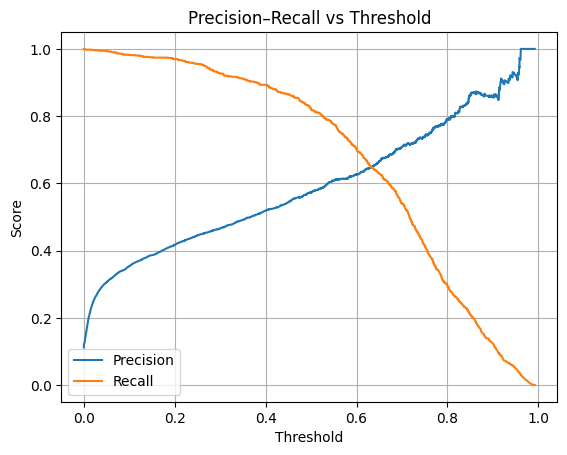

In [ ]:
y_prob = rf.predict_proba(X_test)[:, 1]
prec, rec, thresh = precision_recall_curve(y_test, y_prob)

plt.plot(thresh, prec[:-1], label='Precision')
plt.plot(thresh, rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision–Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


#### Based on the model’s outcomes, the Random Forest classifier demonstrated strong predictive performance overall. At a threshold of 0.25, the model achieved an accuracy of roughly 86%, with a recall of 0.96 for the “yes” class—meaning it successfully identified the vast majority of customers likely to respond positively.

#### This trade-off came with a drop in precision (0.45), indicating that while the model flags many true responders, it also includes some false positives. In marketing terms, this is acceptable—missing a potential customer is generally more costly than reaching out unnecessarily.